In [35]:
%matplotlib inline

import neurolab as nl
import numpy as np
import pylab as pl
from pybrain.tools.shortcuts import buildNetwork 
from pybrain.datasets import SupervisedDataSet
from pybrain.supervised.trainers import BackpropTrainer

In [19]:
rcParams['figure.figsize'] = 20, 10

## Neurolab 

Epoch: 10; Error: 0.167525614294;
Epoch: 20; Error: 0.121071655079;
Epoch: 30; Error: 0.0592391562777;
Epoch: 40; Error: 0.0262775678887;
Epoch: 50; Error: 0.0220527090684;
The goal of learning is reached


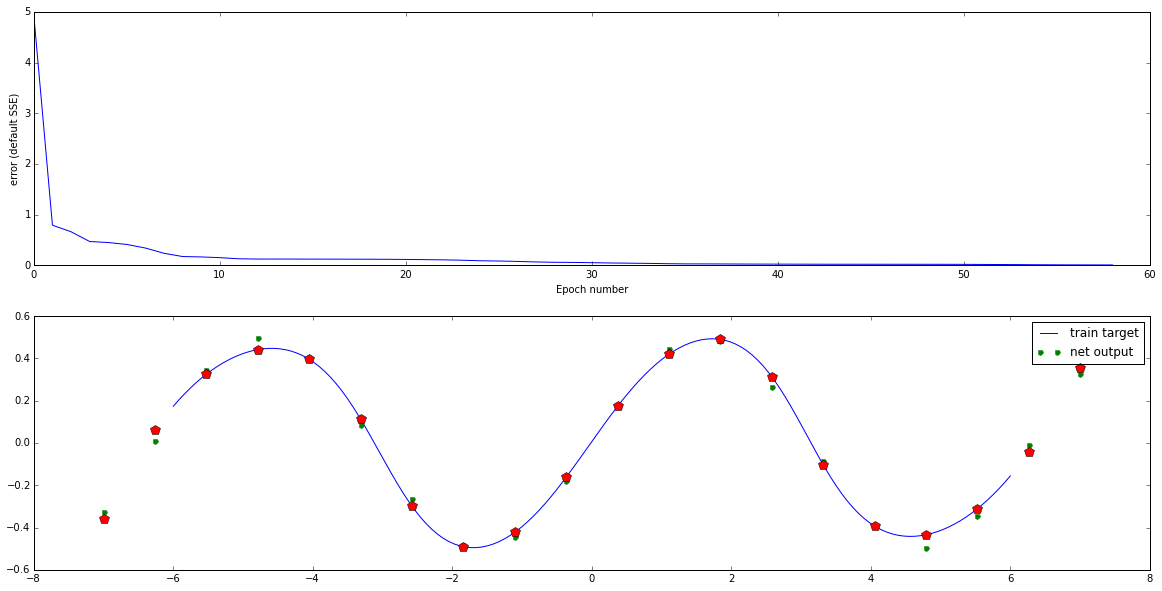

In [25]:
# Create train samples
x = np.linspace(-7, 7, 20)
y = np.sin(x) * 0.5

size = len(x)

inp = x.reshape(size,1)
tar = y.reshape(size,1)

# Create network with 2 layers and random initialized
net = nl.net.newff([[-7, 7]],[5, 1])

# Train network
error = net.train(inp, tar, epochs=500, show=10, goal=0.01)

# Simulate network
out = net.sim(inp)

# Plot result
pl.subplot(211)
pl.plot(error)
pl.xlabel('Epoch number')
pl.ylabel('error (default SSE)')

x2 = np.linspace(-6.0,6.0,150)
y2 = net.sim(x2.reshape(x2.size,1)).reshape(x2.size)

y3 = out.reshape(size)

pl.subplot(212)
pl.plot(x2, y2, '-',x , y, '.', x, y3, 'p', markersize=10)
pl.legend(['train target', 'net output'])


In [59]:
net = buildNetwork(1, 5, 1)
ds = SupervisedDataSet(1, 1)

for i in range(20):
    ds.addSample(x[i], y[i])

trainer = BackpropTrainer(net, ds)
trainer.trainUntilConvergence()

([0.092914765637056126,
  0.068168916135394497,
  0.055858248026947208,
  0.049777390075371249,
  0.046384758055508832,
  0.044616292702511065,
  0.043634900970733567,
  0.043028708263095607,
  0.042637872259701906,
  0.04238114587999537,
  0.042169477893243872,
  0.041922669058156545,
  0.041827489136789103,
  0.041809087278761106,
  0.041648800139137444,
  0.041562645822547602,
  0.041459511577151213,
  0.04140261266946603,
  0.041330687857319463,
  0.041261821708126679,
  0.04115590130751888,
  0.04109783567901102,
  0.041093253107546204,
  0.041051321218688271,
  0.075730784726036518],
 [0.066521995699791975,
  0.060549487435312653,
  0.06520686025568409,
  0.072150994575472138,
  0.078444261158270578,
  0.084353104555637562,
  0.08848249639749467,
  0.09107352569746642,
  0.093047713960272879,
  0.093454965658199884,
  0.093629341830385876,
  0.093826304859921175,
  0.092963591155088204,
  0.092797288529676156,
  0.093634501341325865,
  0.094539080276073453,
  0.094527501762916452

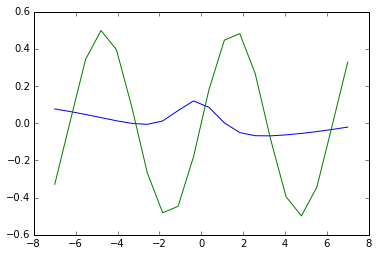

In [57]:
pl.plot(x, net.activateOnDataset(ds))
pl.plot(x, y)